In [2]:
import numpy as np
import random
import multiprocessing as mproc
import matplotlib.pyplot as plt
import tqdm
from tqdm.notebook import tqdm as tqdm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
import pandas as pd
import sys
print(sys.path)

import model_opt
import algo_GD
import helper

['/Users/naoki/ML/GD', '/Users/naoki/ML', '/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python37.zip', '/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7', '/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/lib-dynload', '/usr/local/Cellar/python/3.7.3/Frameworks/Python.framework/Versions/3.7/lib/python3.7', '', '/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages', '/Users/naoki/.local/share/virtualenvs/ML-LMvAiov7/lib/python3.7/site-packages/IPython/extensions', '/Users/naoki/.ipython', '/Applications/PyCharm.app/Contents/plugins/python/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python/helpers-pro/jupyter_debug']


In [3]:
w_init = np.array([3,3])
_t_max = 3000
f = model_opt.RosenBrock()


w_star = f.w_star

last_w_store = []
iqr_store = []
for i in tqdm(range(10)):
    var = np.random.randint(1,300,1)[0]
    noise = helper.gauss
    f = model_opt.RosenBrock(noise=noise,var=var)
    algo = algo_GD.SGD(w_init=w_init,t_max=_t_max,a=0.00078)
    for i in algo:
        algo.update(model=f)
        
    iqr_store.append(helper.iqr(algo.noise_store))
    last_w_store.append(algo.w)

In [4]:
iqr_store

[357.5095956354296,
 33.267745715972474,
 92.41859002057583,
 5.422733882889485,
 400.9896696546974,
 116.5859116808866,
 363.7146478671169,
 370.4577928704033,
 138.92764614926506,
 54.545209766972924]

In [5]:
np.histogram(iqr_store)

(array([2, 1, 2, 1, 0, 0, 0, 0, 1, 3]),
 array([  5.42273388,  44.97942746,  84.53612104, 124.09281461,
        163.64950819, 203.20620177, 242.76289535, 282.31958892,
        321.8762825 , 361.43297608, 400.98966965]))

(array([1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.]),
 array([  5.42273388,   9.37840324,  13.3340726 ,  17.28974196,
         21.24541131,  25.20108067,  29.15675003,  33.11241939,
         37.06808874,  41.0237581 ,  44.97942746,  48.93509682,
         52.89076618,  56.84643553,  60.80210489,  64.75777425,
         68.71344361,  72.66911296,  76.62478232,  80.58045168,
         84.53612104,  88.49179039,  92.44745975,  96.40312911,
        100.35879847, 104.31446783, 108.27013718, 112.22580654,
        116.1814759 , 120.13714526, 124.09281461, 128.04848397,
        132.00415333, 135.95982269, 13

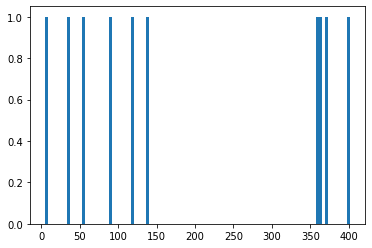

In [6]:
plt.hist(iqr_store,bins=100)

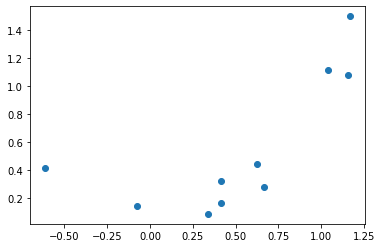

In [7]:
plt.scatter(*np.array(last_w_store).T)

In [8]:
s = np.where(np.array(iqr_store) < 50)

In [9]:
np.array(last_w_store)[s[0]]

array([[0.33913753, 0.08996061],
       [0.41426129, 0.16798484]])

In [10]:
helper.get_index_bins(np.array(iqr_store),300,0)

array([1, 2, 3, 5, 8, 9])

In [11]:
np.max(iqr_store)-np.min(iqr_store) 

395.56693577180795

In [12]:
np.linspace(np.min(iqr_store),np.max(iqr_store),10)

array([  5.42273388,  49.37461564,  93.32649739, 137.27837914,
       181.23026089, 225.18214265, 269.1340244 , 313.08590615,
       357.0377879 , 400.98966965])

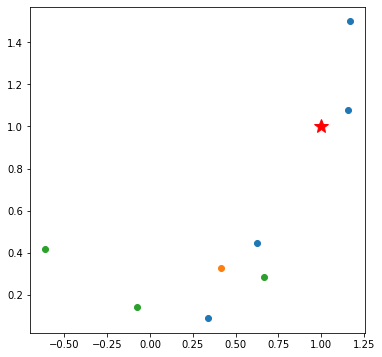

In [13]:
k = 4
fig, axes = plt.subplots(1,1, figsize=(6,6))
for i in range(k-1):
    c = np.linspace(np.min(iqr_store),np.max(iqr_store),k)
    index = helper.get_index_bins(np.array(iqr_store),c[i+1],c[i])
    plt.scatter(*np.array(last_w_store)[index].T)
plt.plot(*w_star, 'r*', markersize=14)

In [14]:
last_w_store = np.array(last_w_store)
last_w_store[0,:].shape

(2,)

In [15]:
import datetime
dt_now = datetime.datetime.now()

data = np.array([iqr_store,last_w_store[:,0],last_w_store[:,1]]).T
df = pd.DataFrame(data=data, columns=['iqr', 'w_0', 'w_1'])



In [16]:
df.to_csv('exp_result/gauss_noise_last_w  {}.csv'.format(dt_now),header=True)

In [17]:
print("hello")
print(dt_now)

hello
2020-07-03 15:27:28.233698
